<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predcting House Prices." </div>

<hr>
<img src="https://i.imgur.com/kCNAFTN.jpg?1" title="source: imgur.com" />

### Data Description

- id:  Unique ID for each home sold
- date: Date of the home sale
- price: Price of each home sold
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living: Square footage of the apartments interior living space
- sqft_lot: Square footage of the land space
- floors: Number of floors
- waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
- view: An index from 0 to 4 of how good the view of the property was
- condition: An index from 1 to 5 on the condition of the apartment,
- grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above: The square footage of the interior housing space that is above ground level
- sqft_basement: The square footage of the interior housing space that is below ground level
- yr_built: The year the house was initially built
- yr_renovated: The year of the house’s last renovation
- zipcode: What zipcode area the house is in
- lat: Lattitude
- long: Longitude
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

- [1. Exploring The Dataset](#1)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Cleaning](#1.3)
        - [1..1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Exploratory Data Anlysis(EDA)](#2)
  
- [3. Data preprocessing and feature engineering](#4)
  
    - [3.1 Min-Max Scaling or Standardization?](#4.1)
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.drop(columns=['id', 'date'], inplace=True)

In [8]:
df.shape

(21613, 19)

In [9]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [10]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [11]:
df.duplicated().sum()

5

In [12]:
df[df.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

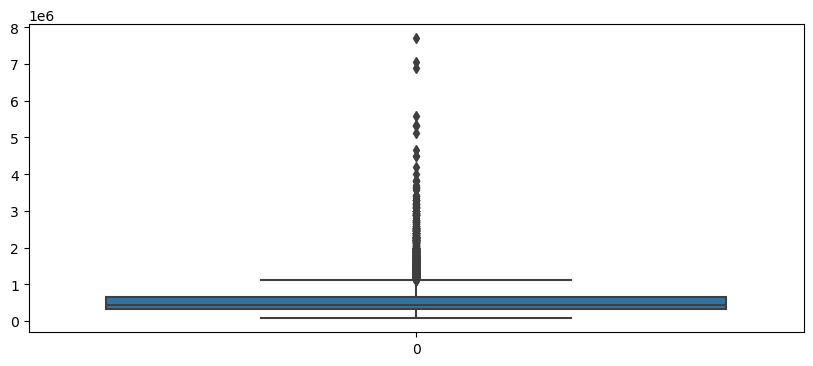

In [16]:
fig, ax = plt.subplots(figsize = (10, 4), dpi = 100)
sns.boxplot(data =df['price'])
plt.show()

## Delection outlier

In [17]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers

In [18]:
outlier_detection(df['price']).index

Index([    5,    21,    49,    69,   125,   153,   216,   246,   269,   270,
       ...
       21525, 21530, 21532, 21540, 21551, 21568, 21576, 21590, 21597, 21600],
      dtype='int64', length=1146)

In [19]:
index_outlier_price = outlier_detection(df['price']).index

In [20]:
df.iloc[outlier_detection(df['price']).index ,0:4 ]

,price,bedrooms,bathrooms,sqft_living
5,1225000.0,4,4.50,5420
21,2000000.0,3,2.75,3050
49,1350000.0,3,2.50,2753
69,1325000.0,5,2.25,3200
125,1450000.0,4,2.75,2750
...,...,...,...,...
21568,1700000.0,4,3.50,3830
21576,3567000.0,5,4.50,4850
21590,1222500.0,4,3.50,4910
21597,1575000.0,4,3.25,3410


In [21]:
df.iloc[index_outlier_price, 0:3]

,price,bedrooms,bathrooms
5,1225000.0,4,4.50
21,2000000.0,3,2.75
49,1350000.0,3,2.50
69,1325000.0,5,2.25
125,1450000.0,4,2.75
...,...,...,...
21568,1700000.0,4,3.50
21576,3567000.0,5,4.50
21590,1222500.0,4,3.50
21597,1575000.0,4,3.25


In [22]:
df.drop(index=index_outlier_price, inplace=True)

In [23]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
len(outlier_detection(df['price']))/len(df)

0.012898812722919822

In [25]:
len(df)

20467


<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Exploratory Data Anlysis(EDA) with Data Visualization</div>

In [29]:
categoric_columns = []
numeric_columns = []
dataset = df.copy()
columns = list(dataset.columns)
for i in columns:
    if len(dataset[i].unique()) > 200:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)


In [30]:
categoric_columns

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'yr_renovated',
 'zipcode']

In [33]:
df[categoric_columns]

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,3,1.00,1.0,0,0,3,7,1955,0,98178
1,3,2.25,2.0,0,0,3,7,1951,1991,98125
2,2,1.00,1.0,0,0,3,6,1933,0,98028
3,4,3.00,1.0,0,0,5,7,1965,0,98136
4,3,2.00,1.0,0,0,3,8,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,2009,0,98103
21609,4,2.50,2.0,0,0,3,8,2014,0,98146
21610,2,0.75,2.0,0,0,3,7,2009,0,98144
21611,3,2.50,2.0,0,0,3,8,2004,0,98027


In [34]:
numeric_columns

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [35]:
df[numeric_columns]

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0,47.5112,-122.257,1340,5650
1,538000.0,2570,7242,2170,400,47.7210,-122.319,1690,7639
2,180000.0,770,10000,770,0,47.7379,-122.233,2720,8062
3,604000.0,1960,5000,1050,910,47.5208,-122.393,1360,5000
4,510000.0,1680,8080,1680,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,1530,0,47.6993,-122.346,1530,1509
21609,400000.0,2310,5813,2310,0,47.5107,-122.362,1830,7200
21610,402101.0,1020,1350,1020,0,47.5944,-122.299,1020,2007
21611,400000.0,1600,2388,1600,0,47.5345,-122.069,1410,1287


In [48]:
df['yr_renovated'].value_counts()

0       19701
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1959        1
1954        1
1951        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [49]:
len(df[numeric_columns].columns)

9

In [50]:
len(numeric_columns)

9

In [53]:
df[numeric_columns].corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.622333,0.093950,0.530451,0.235701,0.430762,0.070863,0.562090,0.082420
sqft_living,0.622333,1.000000,0.158850,0.853561,0.376601,0.011846,0.285045,0.738190,0.172291
sqft_lot,0.093950,0.158850,1.000000,0.162479,0.012009,-0.095172,0.221870,0.142829,0.710757
sqft_above,0.530451,0.853561,0.162479,1.000000,-0.161184,-0.043581,0.388874,0.717799,0.175324
sqft_basement,0.235701,0.376601,0.012009,-0.161184,1.000000,0.099932,-0.151491,0.122047,0.014631
lat,0.430762,0.011846,-0.095172,-0.043581,0.099932,1.000000,-0.132916,0.019487,-0.096427
long,0.070863,0.285045,0.221870,0.388874,-0.151491,-0.132916,1.000000,0.373092,0.249080
sqft_living15,0.562090,0.738190,0.142829,0.717799,0.122047,0.019487,0.373092,1.000000,0.179537
sqft_lot15,0.082420,0.172291,0.710757,0.175324,0.014631,-0.096427,0.249080,0.179537,1.000000


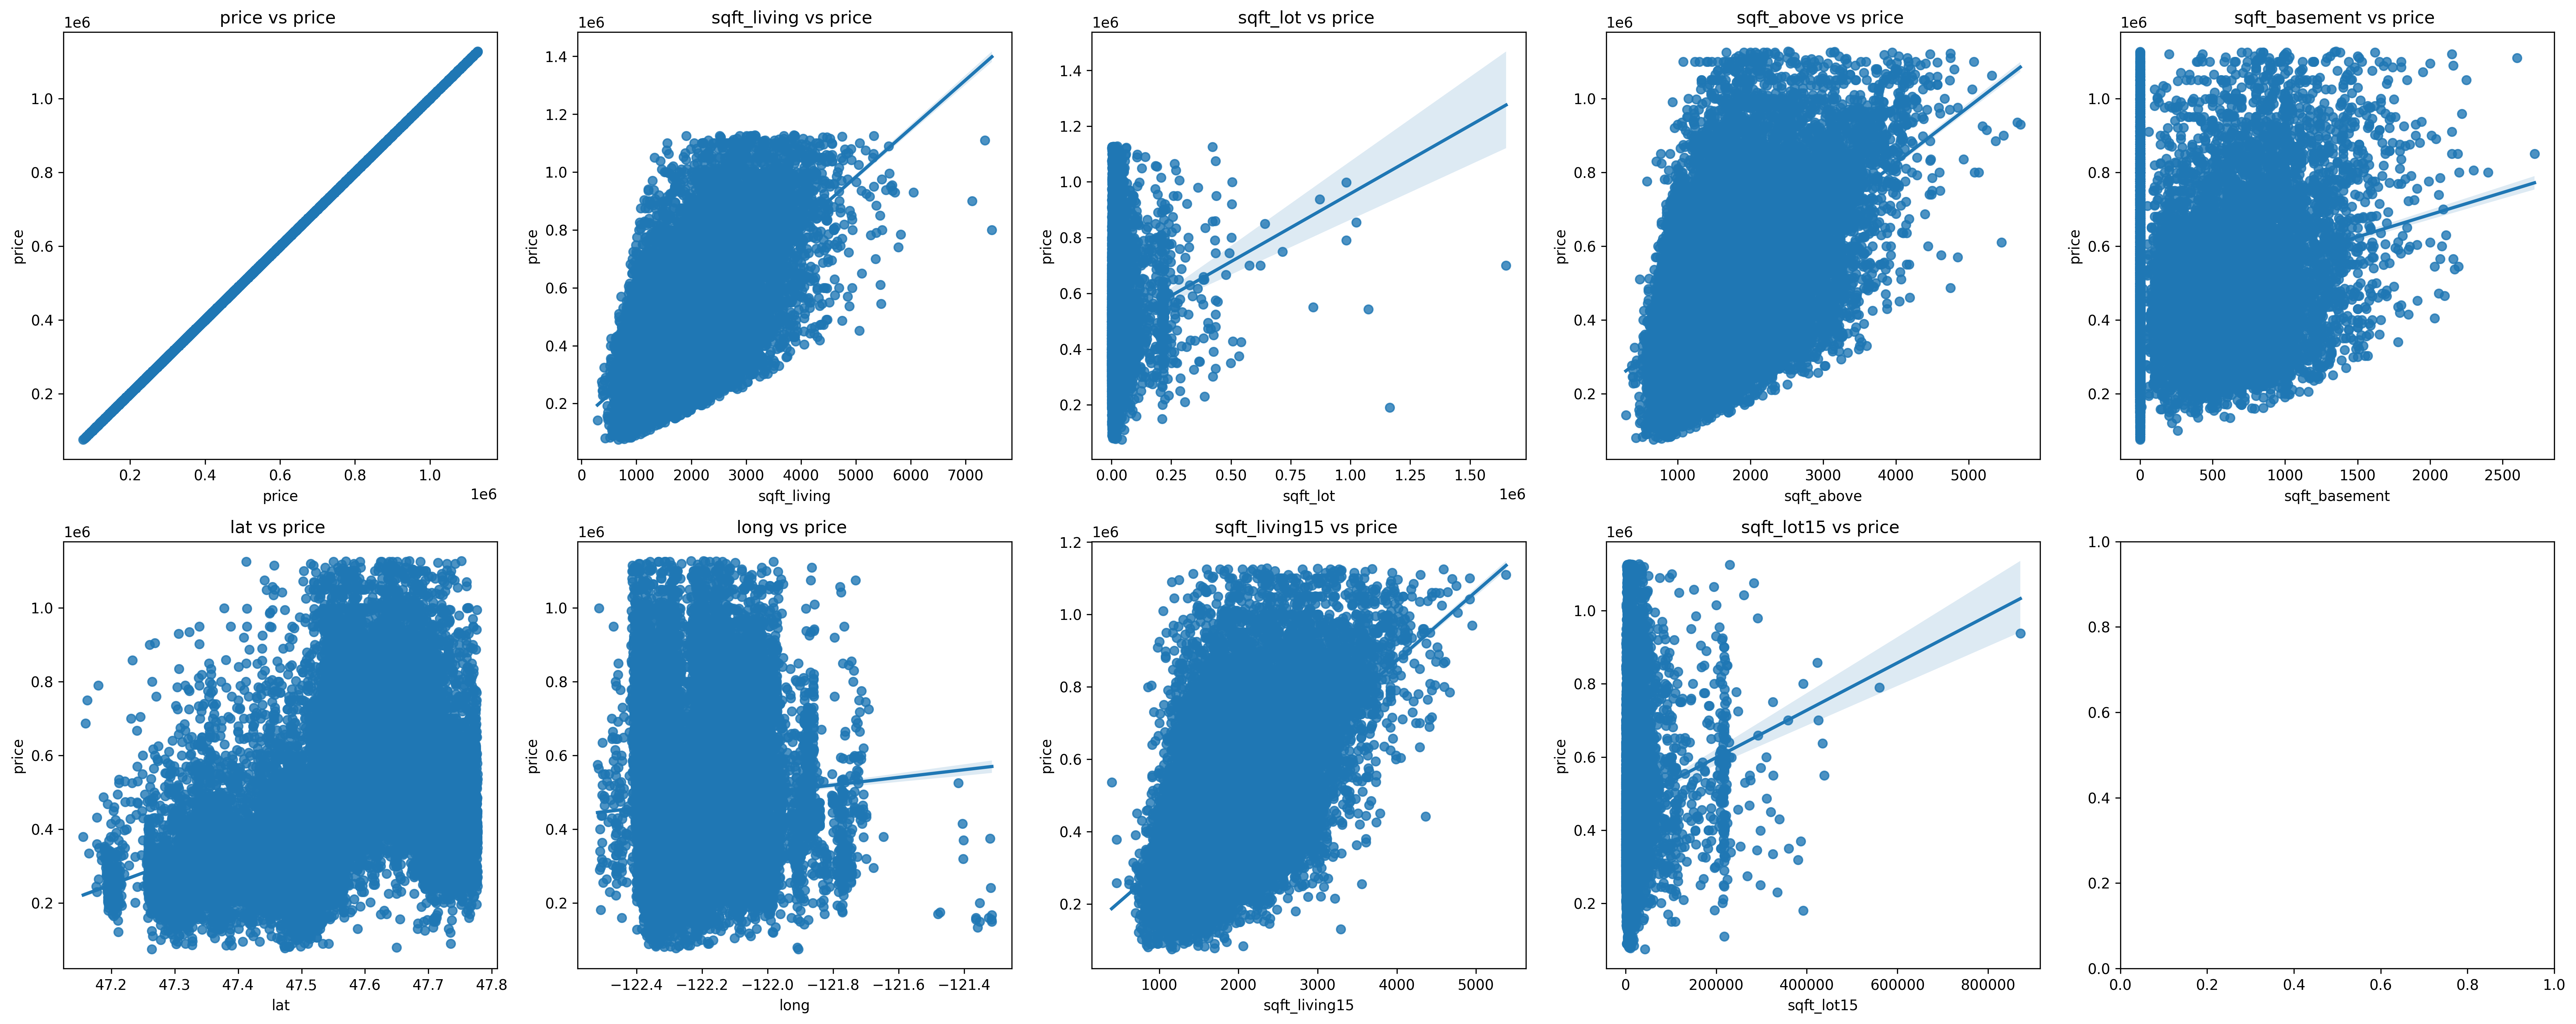

In [51]:
num_cols = 5
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

# Flatten the axes if there is more than one row
axes = axes.flatten()

# Loop through numeric columns and create regplots
for i, col in enumerate(df[numeric_columns].columns):
    sns.regplot(data=df, y=df['price'], x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} vs price ')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df[numeric_columns], hue_order= df['price'] )

In [ ]:
df['yr_built'].describe()

In [ ]:
df['yr_built'].value_counts()

In [ ]:
df['yr_built']

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data= df['yr_built'] )
plt.xticks(np.arange(1900, 2021, 10))
plt.show()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')